In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from scipy.stats import kruskal, ranksums
from statsmodels.stats.multitest import multipletests

# Classification: Predicting VesselGroup

In [2]:
run_class_baseline = pd.read_csv('/Users/fabian/Downloads/MasterDegree/MLflow/class_final.csv')
display(run_class_baseline)

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,aug_type,batch_size,...,test_size,train_size,val_size,window_size,test_accuracy,test_loss,training_accuracy,training_loss,validation_accuracy,validation_loss
0,2025-01-11 09:38:19,47.1min,4eeba628020c4035af77ed13c0aba1f9,GNI_aug200000_1971,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,GNI,64,...,40745,400516,27152,40,0.737649,1.079265,0.919671,0.249210,0.785298,0.878311
1,2025-01-11 08:55:38,42.5min,b9f56b07decf481aa0342a8ffa44aa29,GNI_aug150000_1971,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,GNI,64,...,40745,350382,27152,40,0.730844,1.069782,0.921868,0.243454,0.754242,0.952360
2,2025-01-11 08:15:05,40.3min,6bd951d9355743d3840cc9f0578117a8,GNI_aug100000_1971,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,GNI,64,...,40745,300447,27152,40,0.744380,1.029077,0.920981,0.245804,0.789392,0.861942
3,2025-01-11 07:43:10,31.7min,4a6553d88ecb4a3e840169f30f6f9b50,GNI_aug50000_1971,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,GNI,64,...,40745,250983,27152,40,0.729394,1.024407,0.900862,0.294788,0.764311,0.856443
4,2025-01-11 06:54:57,48.0min,2f91bda909c04ad0ac07b01f00f3f300,GNI_aug200000_2884,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,GNI,64,...,40052,400754,27072,40,0.759397,1.041551,0.921697,0.241326,0.680823,1.392613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2025-01-07 22:34:45,23.4min,6afeeb9833ed45e4a3ccbba9e1c69711,baseline_3846,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,baseline,64,...,40460,200898,27180,40,0.743765,0.889483,0.895190,0.300051,0.708954,0.934292
126,2025-01-07 22:10:39,23.9min,b0ad028309664acdb4d73564c2611136,baseline_7932,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,baseline,64,...,40140,200503,27222,40,0.761421,0.785221,0.904451,0.283836,0.727099,1.005713
127,2025-01-07 21:46:06,24.4min,5bd2f6b4f6de42bb9f7872c975f52075,baseline_3589,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,baseline,64,...,40055,200675,27214,40,0.735349,1.026980,0.908635,0.271357,0.730110,1.128285
128,2025-01-07 21:17:39,28.3min,0690b5480ea34cd6a285b0c48d373599,baseline_9265,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,baseline,64,...,40336,200583,27507,40,0.736996,1.043598,0.912268,0.267396,0.714494,1.033587


In [3]:
selected_columns = {
    'Name': 'Experiment Name',
    'test_accuracy': 'Test Accuracy',
    'Start Time': 'Start Time',
    'Duration': 'Duration',
    'aug_type': 'Augmentation Type',
    'batch_size': 'Batch Size',
    'dropout_rate': 'Dropout Rate',
    'epochs': 'Epochs',
    'lstm_units': 'LSTM Units',
    'num_aug': 'Num Augmented',
    'num_classes': 'Num Classes',
    'test_size': 'Test Size',
    'train_size': 'Train Size',
    'val_size': 'Validation Size',
    'seed': 'Seed'
}

formatted_data = run_class_baseline[list(selected_columns.keys())].rename(columns=selected_columns)

latex_file_path = '/Users/fabian/Downloads/MasterDegree/MLflow/class_final_cleaned'
formatted_data.to_latex(
    latex_file_path, 
    index=False, 
    caption="Summary of Experiment Results", 
    label="tab:experiment_results"
)

print(f"LaTeX table saved at: {latex_file_path}")

LaTeX table saved at: /Users/fabian/Downloads/MasterDegree/MLflow/class_final_cleaned


In [4]:
display(formatted_data)

,Experiment Name,Test Accuracy,Start Time,Duration,Augmentation Type,Batch Size,Dropout Rate,Epochs,LSTM Units,Num Augmented,Num Classes,Test Size,Train Size,Validation Size,Seed
0,GNI_aug200000_1971,0.737649,2025-01-11 09:38:19,47.1min,GNI,64,0.2,50,64,200000,3,40745,400516,27152,1971
1,GNI_aug150000_1971,0.730844,2025-01-11 08:55:38,42.5min,GNI,64,0.2,50,64,150000,3,40745,350382,27152,1971
2,GNI_aug100000_1971,0.744380,2025-01-11 08:15:05,40.3min,GNI,64,0.2,50,64,100000,3,40745,300447,27152,1971
3,GNI_aug50000_1971,0.729394,2025-01-11 07:43:10,31.7min,GNI,64,0.2,50,64,50000,3,40745,250983,27152,1971
4,GNI_aug200000_2884,0.759397,2025-01-11 06:54:57,48.0min,GNI,64,0.2,50,64,200000,3,40052,400754,27072,2884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,baseline_3846,0.743765,2025-01-07 22:34:45,23.4min,baseline,64,0.2,50,64,0,3,40460,200898,27180,3846
126,baseline_7932,0.761421,2025-01-07 22:10:39,23.9min,baseline,64,0.2,50,64,0,3,40140,200503,27222,7932
127,baseline_3589,0.735349,2025-01-07 21:46:06,24.4min,baseline,64,0.2,50,64,0,3,40055,200675,27214,3589
128,baseline_9265,0.736996,2025-01-07 21:17:39,28.3min,baseline,64,0.2,50,64,0,3,40336,200583,27507,9265


In [5]:
cleaned_data = formatted_data[['Experiment Name', 'Test Accuracy', 'Augmentation Type', 'Num Augmented', 'Seed']]
display(cleaned_data)

,Experiment Name,Test Accuracy,Augmentation Type,Num Augmented,Seed
0,GNI_aug200000_1971,0.737649,GNI,200000,1971
1,GNI_aug150000_1971,0.730844,GNI,150000,1971
2,GNI_aug100000_1971,0.744380,GNI,100000,1971
3,GNI_aug50000_1971,0.729394,GNI,50000,1971
4,GNI_aug200000_2884,0.759397,GNI,200000,2884
...,...,...,...,...,...
125,baseline_3846,0.743765,baseline,0,3846
126,baseline_7932,0.761421,baseline,0,7932
127,baseline_3589,0.735349,baseline,0,3589
128,baseline_9265,0.736996,baseline,0,9265


In [6]:
#cleaned_data.to_csv('/Users/fabian/Downloads/cleaned_data_analysis.csv', index=False)

### H1

In [7]:
def recalculate_ranks_and_stats(baseline, augmented):
    """
    Properly compute ranks, rank means, and Wilcoxon rank-sum test statistics for two distributions.
    """

    combined_data = pd.concat([baseline, augmented], axis=0)
    combined_ranks = combined_data.rank()

    baseline_ranks = combined_ranks[:len(baseline)]
    augmented_ranks = combined_ranks[len(baseline):]

    # Compute rank means
    baseline_rank_mean = baseline_ranks.mean()
    augmented_rank_mean = augmented_ranks.mean()

    stat, p_value = ranksums(baseline, augmented)

    return stat, p_value, baseline_rank_mean, augmented_rank_mean

In [8]:
def create_wilcoxon_table(cleaned_data):
    """
    Create a detailed Wilcoxon rank-sum table for baseline and augmented experiments.
    """
    baseline_data = cleaned_data[cleaned_data['Augmentation Type'] == 'baseline']
    baseline_agg = baseline_data.groupby('Seed')['Test Accuracy'].mean()

    results = []

    # Iterate over augmentation types and sizes
    for aug_type in cleaned_data['Augmentation Type'].unique():
        if aug_type == 'baseline':
            continue 

        for num_aug in cleaned_data['Num Augmented'].unique():
            aug_data = cleaned_data[
                (cleaned_data['Augmentation Type'] == aug_type) &
                (cleaned_data['Num Augmented'] == num_aug)
            ]

            if not aug_data.empty:
                aug_agg = aug_data.groupby('Seed')['Test Accuracy'].mean()

                stat, p_value, baseline_rank_mean, augmented_rank_mean = recalculate_ranks_and_stats(
                    baseline_agg, aug_agg
                )

                baseline_mean = baseline_agg.mean()
                augmented_mean = aug_agg.mean()
                mean_difference = augmented_mean - baseline_mean

                if p_value < 0.05:
                    if mean_difference > 0:
                        significance = "Significantly Better"
                    else:
                        significance = "Significantly Worse"
                else:
                    significance = "No"

                results.append({
                    'Augmentation Type': aug_type,
                    'Num Augmented': num_aug,
                    'Baseline Mean Accuracy': baseline_mean,
                    'Augmented Mean Accuracy': augmented_mean,
                    'Mean Difference': mean_difference,
                    'Baseline Rank Mean': baseline_rank_mean,
                    'Augmented Rank Mean': augmented_rank_mean,
                    'Statistic': stat,
                    'P-Value': p_value,
                    'Significant Result': significance
                })

    results_df = pd.DataFrame(results)
    return results_df

wilcoxon_table = create_wilcoxon_table(cleaned_data)
display(wilcoxon_table)

,Augmentation Type,Num Augmented,Baseline Mean Accuracy,Augmented Mean Accuracy,Mean Difference,Baseline Rank Mean,Augmented Rank Mean,Statistic,P-Value,Significant Result
0,GNI,200000,0.74066,0.744638,0.003978,10.0,11.0,-0.377964,0.705457,No
1,GNI,150000,0.74066,0.743134,0.002473,10.3,10.7,-0.151186,0.879829,No
2,GNI,100000,0.74066,0.746725,0.006065,9.4,11.6,-0.831522,0.405679,No
3,GNI,50000,0.74066,0.742082,0.001422,10.5,10.5,0.000000,1.000000,No
4,vae,200000,0.74066,0.720512,-0.020149,13.9,7.1,2.570158,0.010165,Significantly Worse
5,vae,150000,0.74066,0.720888,-0.019773,13.7,7.3,2.418973,0.015564,Significantly Worse
6,vae,100000,0.74066,0.719343,-0.021318,13.9,7.1,2.570158,0.010165,Significantly Worse
7,vae,50000,0.74066,0.722034,-0.018627,12.7,8.3,1.663044,0.096304,No
8,kmeans,200000,0.74066,0.735815,-0.004846,10.5,10.5,0.000000,1.000000,No
9,kmeans,150000,0.74066,0.740099,-0.000561,10.8,10.2,0.226779,0.820596,No


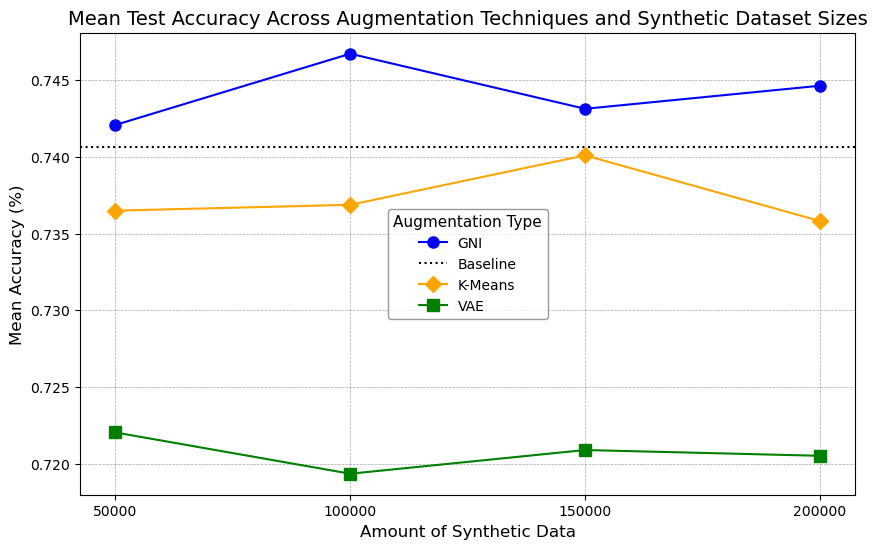

In [9]:
def plot_results_with_baseline_and_styles(cleaned_data):
    plt.figure(figsize=(10, 6))

    styles = {
        'GNI': {'marker': 'o', 'linestyle': '-', 'label': 'GNI', 'color': 'blue'},
        'vae': {'marker': 's', 'linestyle': '-', 'label': 'VAE', 'color': 'green'},
        'kmeans': {'marker': 'D', 'linestyle': '-', 'label': 'K-Means', 'color': 'orange'},
        'baseline': {'linestyle': 'dotted', 'label': 'Baseline', 'color': 'black'}
    }

    agg_data = cleaned_data.groupby(['Augmentation Type', 'Num Augmented'])['Test Accuracy'].mean().reset_index()

    for aug_type in agg_data['Augmentation Type'].unique():
        if aug_type == 'baseline':
            baseline_accuracy = agg_data[agg_data['Augmentation Type'] == 'baseline']['Test Accuracy'].iloc[0]
            plt.axhline(
                y=baseline_accuracy, color=styles['baseline']['color'], linestyle=styles['baseline']['linestyle'], 
                label=styles['baseline']['label'], linewidth=1.5
            )
        else:
            aug_data = agg_data[agg_data['Augmentation Type'] == aug_type]
            plt.plot(
                aug_data['Num Augmented'], aug_data['Test Accuracy'], 
                marker=styles[aug_type]['marker'], linestyle=styles[aug_type]['linestyle'], 
                label=styles[aug_type]['label'], color=styles[aug_type]['color'], markersize=8, linewidth=1.5
            )

    plt.xticks([50000, 100000, 150000, 200000])
    plt.xlabel('Amount of Synthetic Data', fontsize=12)
    plt.ylabel('Mean Accuracy (%)', fontsize=12)
    plt.title('Mean Test Accuracy Across Augmentation Techniques and Synthetic Dataset Sizes', fontsize=14)

    plt.legend(loc='best', fontsize=10, frameon=True, edgecolor='gray', title="Augmentation Type", title_fontsize=11)

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.show()

plot_results_with_baseline_and_styles(cleaned_data)

In [10]:
summary_stats = (
    cleaned_data.groupby('Augmentation Type')['Test Accuracy']
    .agg(['mean', 'min', 'max'])
    .rename(columns={'mean': 'Mean Accuracy', 'min': 'Min Accuracy', 'max': 'Max Accuracy'})
    .reset_index()
)

print(summary_stats)

  Augmentation Type  Mean Accuracy  Min Accuracy  Max Accuracy
0               GNI       0.744145      0.716438      0.776738
1          baseline       0.740660      0.724194      0.761421
2            kmeans       0.737321      0.696035      0.773033
3               vae       0.720694      0.691149      0.764988


In [11]:
selected_columns = {
    'Name': 'Experiment Name',
    'test_accuracy': 'Accuracy (%)',
    'Start Time': 'Start Time',
    'Duration': 'Duration',
    'aug_type': 'Augmentation Type',
    'batch_size': 'Batch Size',
    'epochs': 'Epochs',
    'lstm_units': 'LSTM Units',
    'num_aug': 'Num Augmented',
    'test_size': 'Test Size',
    'train_size': 'Train Size',
    'val_size': 'Validation Size',
    'seed': 'Seed'
}

formatted_data = run_class_baseline[list(selected_columns.keys())].rename(columns=selected_columns)

formatted_data = formatted_data.replace({"_": r"\_", "%": r"\%"}, regex=True)

latex_file_path = '/Users/fabian/Downloads/MasterDegree/MLflow/class_results_table.tex'

formatted_data.to_latex(
    latex_file_path,
    index=False,
    escape=False,
    caption="Summary of Experiment Results",
    label="tab:experiment_results"
)

print(f"LaTeX table saved at: {latex_file_path}")

LaTeX table saved at: /Users/fabian/Downloads/MasterDegree/MLflow/class_results_table.tex


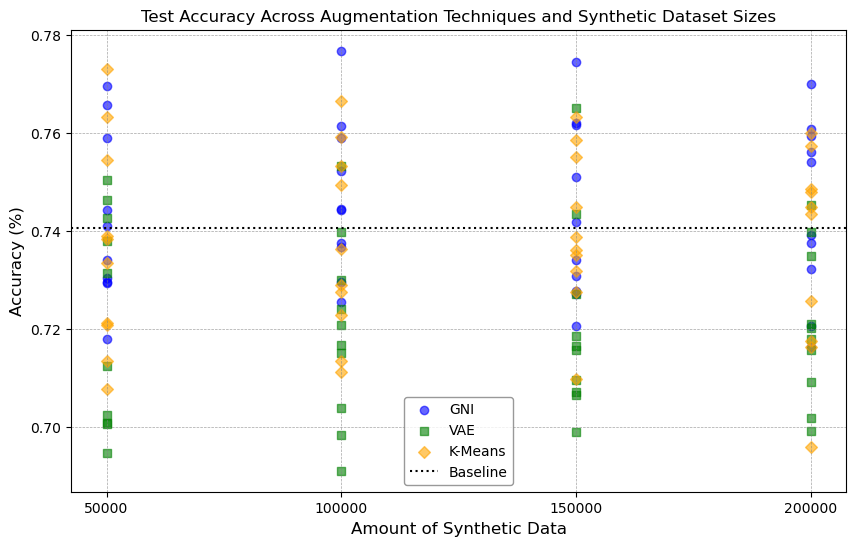

In [12]:
def plot_individual_points(cleaned_data):
    plt.figure(figsize=(10, 6))

    styles = {
        'GNI': {'marker': 'o', 'label': 'GNI', 'color': 'blue'},
        'vae': {'marker': 's', 'label': 'VAE', 'color': 'green'},
        'kmeans': {'marker': 'D', 'label': 'K-Means', 'color': 'orange'},
    }

    legend_added = set()

    for aug_type in cleaned_data['Augmentation Type'].unique():
        if aug_type == 'baseline':
            baseline_data = cleaned_data[cleaned_data['Augmentation Type'] == 'baseline']
            baseline_accuracy = baseline_data['Test Accuracy'].mean()
            plt.axhline(
                y=baseline_accuracy, color='black', linestyle='dotted', label='Baseline', linewidth=1.5
            )
        else:
            for num_aug in cleaned_data['Num Augmented'].unique():
                aug_data = cleaned_data[
                    (cleaned_data['Augmentation Type'] == aug_type) &
                    (cleaned_data['Num Augmented'] == num_aug)
                ]
                if len(aug_data) > 0:
                    plt.scatter(
                        [num_aug] * len(aug_data), aug_data['Test Accuracy'],
                        label=styles[aug_type]['label'] if aug_type not in legend_added else "",
                        alpha=0.6, color=styles[aug_type]['color'], marker=styles[aug_type]['marker']
                    )
                    legend_added.add(aug_type)

    plt.xticks([50000, 100000, 150000, 200000])
    plt.xlabel('Amount of Synthetic Data', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('Test Accuracy Across Augmentation Techniques and Synthetic Dataset Sizes', fontsize=12)

    plt.legend(loc='best', fontsize=10, frameon=True, edgecolor='gray')

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.show()

plot_individual_points(cleaned_data)

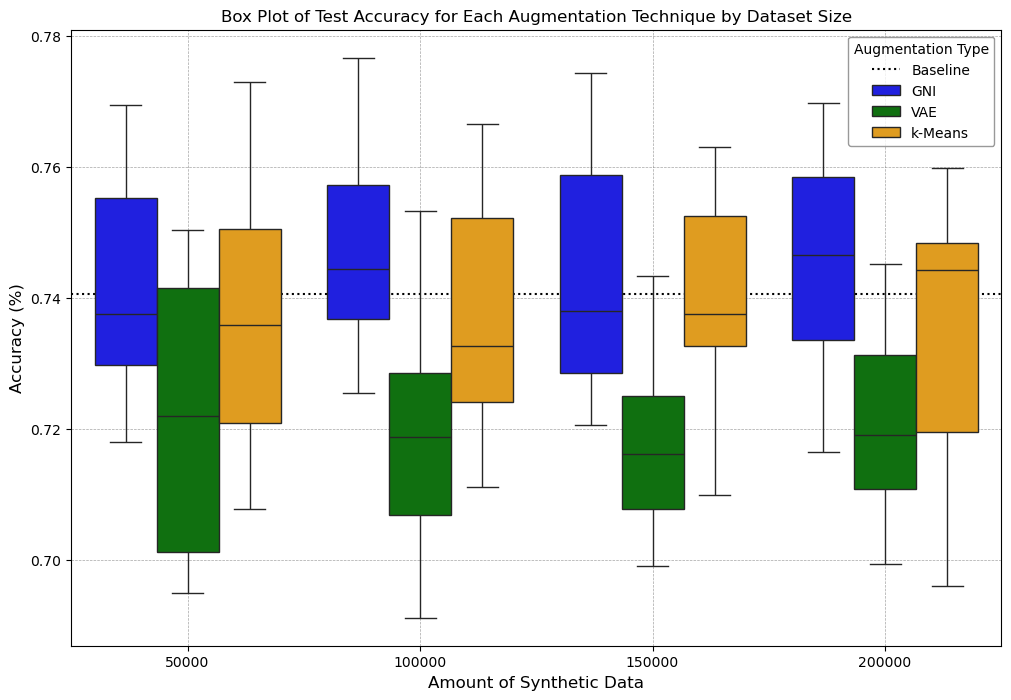

In [13]:
def boxplot(cleaned_data):
    plt.figure(figsize=(12, 8))
    
    styles = {
        'GNI': {'marker': 'o', 'label': 'GNI', 'color': 'blue'},
        'vae': {'marker': 's', 'label': 'VAE', 'color': 'green'},
        'kmeans': {'marker': 'D', 'label': 'k-Means', 'color': 'orange'},
    }
    
    baseline_data = cleaned_data[cleaned_data['Augmentation Type'] == 'baseline']
    if not baseline_data.empty:
        baseline_accuracy = baseline_data['Test Accuracy'].mean()
        plt.axhline(
            y=baseline_accuracy, 
            color='black', 
            linestyle='dotted', 
            label='Baseline', 
            linewidth=1.5
        )
    
    data_without_baseline = cleaned_data[cleaned_data['Augmentation Type'] != 'baseline'].copy()
    data_without_baseline['Augmentation Type'] = data_without_baseline['Augmentation Type'].replace({
        'vae': 'VAE',
        'kmeans': 'k-Means'
    })
    
    palette = {
        'GNI': 'blue',
        'VAE': 'green',
        'k-Means': 'orange'
    }
    
    sns.boxplot(
        data=data_without_baseline,
        x='Num Augmented',
        y='Test Accuracy',
        hue='Augmentation Type',
        palette=palette,
        showfliers=False
    )
    
    plt.xlabel('Amount of Synthetic Data', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('Box Plot of Test Accuracy for Each Augmentation Technique by Dataset Size', fontsize=12)
    plt.legend(title='Augmentation Type', loc='best', fontsize=10, frameon=True, edgecolor='gray')
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()
    plt.show()


boxplot(cleaned_data)

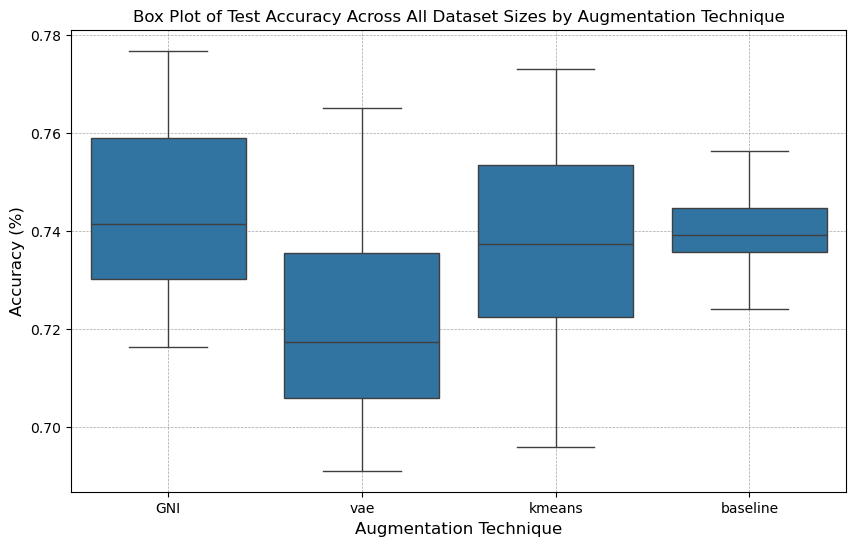

In [14]:
def plot_single_boxplot_per_technique(cleaned_data):
    plt.figure(figsize=(10, 6))

    sns.boxplot(
        data=cleaned_data,
        x='Augmentation Type',
        y='Test Accuracy',
        showfliers=False
    )

    plt.xlabel('Augmentation Technique', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('Box Plot of Test Accuracy Across All Dataset Sizes by Augmentation Technique', fontsize=12)

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.show()

plot_single_boxplot_per_technique(cleaned_data)

### H2

In [15]:
augmented_data = cleaned_data[cleaned_data['Augmentation Type'].isin(['GNI', 'vae', 'kmeans'])]
grouped_data = augmented_data.groupby('Augmentation Type')['Test Accuracy']

groups = [grouped_data.get_group(aug_type) for aug_type in grouped_data.groups]

kruskal_stat, kruskal_p = kruskal(*groups)
print(f"Kruskal-Wallis Statistic: {kruskal_stat}, P-Value: {kruskal_p}")

if kruskal_p < 0.05:
    print("Significant differences detected between augmentation techniques.")

    pairwise_results = []
    for (group1, group2) in itertools.combinations(grouped_data.groups.keys(), 2):
        stat, p_value = ranksums(
            grouped_data.get_group(group1),
            grouped_data.get_group(group2)
        )
        pairwise_results.append({
            'Group 1': group1,
            'Group 2': group2,
            'Statistic': stat,
            'P-Value': p_value
        })

    p_values = [result['P-Value'] for result in pairwise_results]
    corrected_p_values = multipletests(p_values, method='bonferroni')[1]

    for i, result in enumerate(pairwise_results):
        result['Corrected P-Value'] = corrected_p_values[i]
        result['Significant Difference'] = 'Yes' if corrected_p_values[i] < 0.05 else 'No'

    pairwise_df = pd.DataFrame(pairwise_results)
    print(pairwise_df)
else:
    print("No significant differences detected between augmentation techniques.")

Kruskal-Wallis Statistic: 26.25520661157026, P-Value: 1.989547552193285e-06
Significant differences detected between augmentation techniques.
  Group 1 Group 2  Statistic   P-Value  Corrected P-Value  \
0     GNI  kmeans   1.510733  0.130856           0.392569   
1     GNI     vae   4.878610  0.000001           0.000003   
2  kmeans     vae   3.627684  0.000286           0.000858   

  Significant Difference  
0                     No  
1                    Yes  
2                    Yes  


In [16]:
ranking = augmented_data.groupby('Augmentation Type')['Test Accuracy'].mean().reset_index()
ranking = ranking.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)
ranking['Rank'] = range(1, len(ranking) + 1)

print("Ranking of Augmentation Techniques by Mean Test Accuracy:")
print(ranking)

if 'pairwise_df' in locals(): 
    for i, row in ranking.iterrows():
        current_group = row['Augmentation Type']
        significant_comparisons = pairwise_df[
            (pairwise_df['Group 1'] == current_group) | (pairwise_df['Group 2'] == current_group)
        ]
        print(f"\nSignificant differences for {current_group}:")
        print(significant_comparisons[['Group 1', 'Group 2', 'Significant Difference']])

Ranking of Augmentation Techniques by Mean Test Accuracy:
  Augmentation Type  Test Accuracy  Rank
0               GNI       0.744145     1
1            kmeans       0.737321     2
2               vae       0.720694     3

Significant differences for GNI:
  Group 1 Group 2 Significant Difference
0     GNI  kmeans                     No
1     GNI     vae                    Yes

Significant differences for kmeans:
  Group 1 Group 2 Significant Difference
0     GNI  kmeans                     No
2  kmeans     vae                    Yes

Significant differences for vae:
  Group 1 Group 2 Significant Difference
1     GNI     vae                    Yes
2  kmeans     vae                    Yes


# Regression: Predicting the Vessels Position

In [17]:
run_reg_baseline = pd.read_csv('/Users/fabian/Downloads/MasterDegree/MLflow/reg_final.csv')
display(run_reg_baseline)

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,aug_type,batch_size,...,rows_sum,seed,step size,test_size,train_size,val_size,window_size,Average Haversine Distance,Training Loss,Validation Loss
0,2025-01-18 00:34:43,1.5h,599e37906fd44da7a4c82015b09fe7fe,GNI_aug200000_1971,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,GNI,64,...,468413,1971,1,40745,400516,27152,50,2.488825,0.000001,7.857906e-08
1,2025-01-17 23:16:41,1.3h,a78a7c9b93894b0ead5b8c0ea3535856,GNI_aug150000_1971,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,GNI,64,...,418279,1971,1,40745,350382,27152,50,19.104120,0.000001,8.908680e-07
2,2025-01-17 22:08:29,1.1h,530c64c9f162499090410ca9ffc179dd,GNI_aug100000_1971,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,GNI,64,...,368344,1971,1,40745,300447,27152,50,21.095656,0.000001,4.455596e-07
3,2025-01-17 21:10:26,57.9min,b9bed1261f894733bc6b1dee8c3103bd,GNI_aug50000_1971,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,GNI,64,...,318880,1971,1,40745,250983,27152,50,4.893996,0.000001,1.635165e-07
4,2025-01-17 19:38:36,1.5h,809ced81c1ce4c049a2f58d94fac5d5e,GNI_aug200000_2884,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,GNI,64,...,467878,2884,1,40052,400754,27072,50,4.223395,0.000001,1.518229e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2025-01-11 16:17:51,53.0min,766f3b8d459d439991a3ebdc2c56343a,baseline_3846,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,baseline,64,...,268538,3846,1,40460,200898,27180,50,3.933380,0.000003,1.844575e-07
126,2025-01-11 15:27:35,50.1min,7cea11827a2848dba57ebb56aad13f13,baseline_7932,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,baseline,64,...,267865,7932,1,40140,200503,27222,50,6.078292,0.000002,2.412449e-07
127,2025-01-11 14:40:50,46.6min,5444dd3d9c204917a243b6052f785594,baseline_3589,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,baseline,64,...,267944,3589,1,40055,200675,27214,50,5.213234,0.000004,1.473011e-07
128,2025-01-11 13:50:51,49.9min,c9f1e83cecde40e6b7b7985f23c5f40a,baseline_9265,LOCAL,/opt/anaconda3/lib/python3.12/site-packages/ip...,fabian,FINISHED,baseline,64,...,268426,9265,1,40336,200583,27507,50,122.239698,0.000003,1.376954e-05


In [18]:
selected_columns = {
    'Name': 'Experiment Name',
    'Average Haversine Distance': 'Haversine Distance (km)',
    'Start Time': 'Start Time',
    'Duration': 'Duration',
    'aug_type': 'Augmentation Type',
    'batch_size': 'Batch Size',
    'epochs': 'Epochs',
    'lstm_units': 'LSTM Units',
    'num_aug': 'Num Augmented',
    'test_size': 'Test Size',
    'train_size': 'Train Size',
    'val_size': 'Validation Size',
    'seed': 'Seed'
}

formatted_data = run_reg_baseline[list(selected_columns.keys())].rename(columns=selected_columns)

latex_file_path = '/Users/fabian/Downloads/MasterDegree/MLflow/reg_final_cleaned'
formatted_data.to_latex(
    latex_file_path, 
    index=False, 
    caption="Summary of Experiment Results", 
    label="tab:experiment_results"
)

print(f"LaTeX table saved at: {latex_file_path}")

LaTeX table saved at: /Users/fabian/Downloads/MasterDegree/MLflow/reg_final_cleaned


In [19]:
display(formatted_data)

,Experiment Name,Haversine Distance (km),Start Time,Duration,Augmentation Type,Batch Size,Epochs,LSTM Units,Num Augmented,Test Size,Train Size,Validation Size,Seed
0,GNI_aug200000_1971,2.488825,2025-01-18 00:34:43,1.5h,GNI,64,50,64,200000,40745,400516,27152,1971
1,GNI_aug150000_1971,19.104120,2025-01-17 23:16:41,1.3h,GNI,64,50,64,150000,40745,350382,27152,1971
2,GNI_aug100000_1971,21.095656,2025-01-17 22:08:29,1.1h,GNI,64,50,64,100000,40745,300447,27152,1971
3,GNI_aug50000_1971,4.893996,2025-01-17 21:10:26,57.9min,GNI,64,50,64,50000,40745,250983,27152,1971
4,GNI_aug200000_2884,4.223395,2025-01-17 19:38:36,1.5h,GNI,64,50,64,200000,40052,400754,27072,2884
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,baseline_3846,3.933380,2025-01-11 16:17:51,53.0min,baseline,64,50,64,0,40460,200898,27180,3846
126,baseline_7932,6.078292,2025-01-11 15:27:35,50.1min,baseline,64,50,64,0,40140,200503,27222,7932
127,baseline_3589,5.213234,2025-01-11 14:40:50,46.6min,baseline,64,50,64,0,40055,200675,27214,3589
128,baseline_9265,122.239698,2025-01-11 13:50:51,49.9min,baseline,64,50,64,0,40336,200583,27507,9265


In [20]:
cleaned_data = formatted_data[['Experiment Name', 'Haversine Distance (km)', 'Augmentation Type', 'Num Augmented', 'Seed']]
display(cleaned_data)

,Experiment Name,Haversine Distance (km),Augmentation Type,Num Augmented,Seed
0,GNI_aug200000_1971,2.488825,GNI,200000,1971
1,GNI_aug150000_1971,19.104120,GNI,150000,1971
2,GNI_aug100000_1971,21.095656,GNI,100000,1971
3,GNI_aug50000_1971,4.893996,GNI,50000,1971
4,GNI_aug200000_2884,4.223395,GNI,200000,2884
...,...,...,...,...,...
125,baseline_3846,3.933380,baseline,0,3846
126,baseline_7932,6.078292,baseline,0,7932
127,baseline_3589,5.213234,baseline,0,3589
128,baseline_9265,122.239698,baseline,0,9265


In [21]:
#cleaned_data.to_csv('/Users/fabian/Downloads/cleaned_data_analysis_reg.csv', index=False)

### H1

In [22]:
def perform_wilcoxon_test(baseline_mean, augmented_means, augmentation_type):
    """
    Perform the Wilcoxon rank-sum test with debug output.
    """
    if len(augmented_means) == 0:
        raise ValueError(f"No augmented means provided for augmentation type: {augmentation_type}")

    all_data = [baseline_mean] * len(augmented_means) + augmented_means
    ranks = pd.Series(all_data).rank()

    baseline_ranks = ranks[:len(augmented_means)]
    augmented_ranks = ranks[len(augmented_means):]

    print(f"Augmentation Type: {augmentation_type}")
    print(f"Baseline Ranks: {baseline_ranks.values}")
    print(f"Augmented Ranks: {augmented_ranks.values}")

    stat, p_value = ranksums([baseline_mean] * len(augmented_means), augmented_means)

    print(f"Statistic: {stat}, P-Value: {p_value}")

    return stat, p_value

In [23]:
def compare_augmentation_to_baseline(cleaned_data):
    """
    Compare each augmentation technique (across all configurations) to the baseline using the Wilcoxon rank-sum test.
    """
    baseline_data = cleaned_data[cleaned_data['Augmentation Type'] == 'baseline']
    if baseline_data.empty:
        raise ValueError("No baseline data found in the dataset.")
    baseline_mean = baseline_data['Haversine Distance (km)'].mean()

    results = []

    for aug_type in cleaned_data['Augmentation Type'].unique():
        if aug_type == 'baseline':
            continue 

        augmented_means = []
        for num_aug in cleaned_data['Num Augmented'].unique():
            aug_data = cleaned_data[
                (cleaned_data['Augmentation Type'] == aug_type) &
                (cleaned_data['Num Augmented'] == num_aug)
            ]

            if not aug_data.empty:
                augmented_mean = aug_data['Haversine Distance (km)'].mean()
                augmented_means.append(augmented_mean)

        print(f"Augmentation Type: {aug_type}")
        print(f"Augmented Means: {augmented_means}")

        if len(augmented_means) > 0:
            stat, p_value = perform_wilcoxon_test(baseline_mean, augmented_means, aug_type)

            mean_difference = sum(augmented_means) / len(augmented_means) - baseline_mean

            if p_value < 0.05:
                significance = "Significantly Better" if mean_difference < 0 else "Significantly Worse"
            else:
                significance = "No"

            results.append({
                'Augmentation Type': aug_type,
                'Baseline Mean Haversine': baseline_mean,
                'Augmented Means': augmented_means,
                'Mean Difference': mean_difference,
                'Statistic': stat,
                'P-Value': p_value,
                'Significant Result': significance
            })

    if not results:
        raise ValueError("No results generated. Check the dataset for valid augmentation types.")
    results_df = pd.DataFrame(results)
    return results_df

wilcoxon_results = compare_augmentation_to_baseline(cleaned_data)
display(wilcoxon_results)

Augmentation Type: GNI
Augmented Means: [15.81537485981888, 8.048051228656055, 10.033654204082156, 7.188166703606788]
Augmentation Type: GNI
Baseline Ranks: [6.5 6.5 6.5 6.5]
Augmented Ranks: [4. 2. 3. 1.]
Statistic: 2.3094010767585034, P-Value: 0.020921335337794018
Augmentation Type: vae
Augmented Means: [11.24702168763957, 5.893207173281541, 12.360645611146973, 9.6362346370048]
Augmentation Type: vae
Baseline Ranks: [6.5 6.5 6.5 6.5]
Augmented Ranks: [3. 1. 4. 2.]
Statistic: 2.3094010767585034, P-Value: 0.020921335337794018
Augmentation Type: kmeans
Augmented Means: [9.092410005658227, 24.198654324783263, 10.88079674847418, 10.25959187879762]
Augmentation Type: kmeans
Baseline Ranks: [5.5 5.5 5.5 5.5]
Augmented Ranks: [1. 8. 3. 2.]
Statistic: 1.1547005383792517, P-Value: 0.2482130789899235


,Augmentation Type,Baseline Mean Haversine,Augmented Means,Mean Difference,Statistic,P-Value,Significant Result
0,GNI,20.149714,"[15.81537485981888, 8.048051228656055, 10.0336...",-9.878402,2.309401,0.020921,Significantly Better
1,vae,20.149714,"[11.24702168763957, 5.893207173281541, 12.3606...",-10.365437,2.309401,0.020921,Significantly Better
2,kmeans,20.149714,"[9.092410005658227, 24.198654324783263, 10.880...",-6.541851,1.154701,0.248213,No


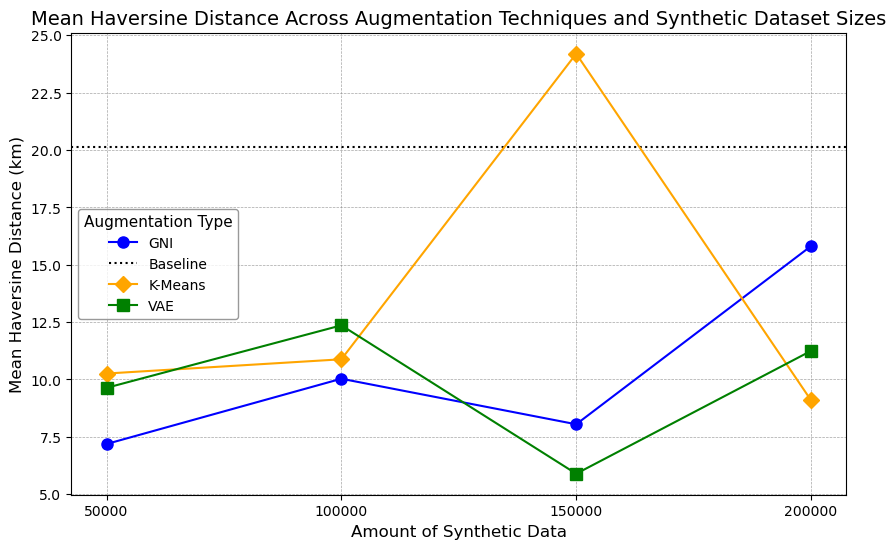

In [24]:
def plot_results_with_baseline_and_styles(cleaned_data):
    plt.figure(figsize=(10, 6))

    styles = {
        'GNI': {'marker': 'o', 'linestyle': '-', 'label': 'GNI', 'color': 'blue'},
        'vae': {'marker': 's', 'linestyle': '-', 'label': 'VAE', 'color': 'green'},
        'kmeans': {'marker': 'D', 'linestyle': '-', 'label': 'K-Means', 'color': 'orange'},
        'baseline': {'linestyle': 'dotted', 'label': 'Baseline', 'color': 'black'}
    }

    agg_data = cleaned_data.groupby(['Augmentation Type', 'Num Augmented'])['Haversine Distance (km)'].mean().reset_index()

    for aug_type in agg_data['Augmentation Type'].unique():
        if aug_type == 'baseline':
            baseline_accuracy = agg_data[agg_data['Augmentation Type'] == 'baseline']['Haversine Distance (km)'].iloc[0]
            plt.axhline(
                y=baseline_accuracy, color=styles['baseline']['color'], linestyle=styles['baseline']['linestyle'], 
                label=styles['baseline']['label'], linewidth=1.5
            )
        else:
            aug_data = agg_data[agg_data['Augmentation Type'] == aug_type]
            plt.plot(
                aug_data['Num Augmented'], aug_data['Haversine Distance (km)'], 
                marker=styles[aug_type]['marker'], linestyle=styles[aug_type]['linestyle'], 
                label=styles[aug_type]['label'], color=styles[aug_type]['color'], markersize=8, linewidth=1.5
            )

    plt.xticks([50000, 100000, 150000, 200000])
    plt.xlabel('Amount of Synthetic Data', fontsize=12)
    plt.ylabel('Mean Haversine Distance (km)', fontsize=12)
    plt.title('Mean Haversine Distance Across Augmentation Techniques and Synthetic Dataset Sizes', fontsize=14)

    plt.legend(loc='best', fontsize=10, frameon=True, edgecolor='gray', title="Augmentation Type", title_fontsize=11)

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.show()

plot_results_with_baseline_and_styles(cleaned_data)

In [25]:
summary_stats = (
    cleaned_data.groupby('Augmentation Type')['Haversine Distance (km)']
    .agg(['mean', 'min', 'max'])
    .rename(columns={'mean': 'Mean Haversine', 'min': 'Min Haversine', 'max': 'Max Haversine'})
    .reset_index()
)

print(summary_stats)

  Augmentation Type  Mean Haversine  Min Haversine  Max Haversine
0               GNI       10.271312       2.330389      52.467932
1          baseline       20.149714       2.954828     122.239698
2            kmeans       13.607863       3.169065     144.225553
3               vae        9.784277       2.343146      52.053910


In [26]:
selected_columns = {
    'Name': 'Experiment Name',
    'Average Haversine Distance': 'Haversine Distance (km)',
    'Start Time': 'Start Time',
    'Duration': 'Duration',
    'aug_type': 'Augmentation Type',
    'batch_size': 'Batch Size',
    'epochs': 'Epochs',
    'lstm_units': 'LSTM Units',
    'num_aug': 'Num Augmented',
    'test_size': 'Test Size',
    'train_size': 'Train Size',
    'val_size': 'Validation Size',
    'seed': 'Seed'
}

formatted_data = run_reg_baseline[list(selected_columns.keys())].rename(columns=selected_columns)

formatted_data = formatted_data.replace({"_": r"\_", "%": r"\%"}, regex=True)

latex_file_path = '/Users/fabian/Downloads/MasterDegree/MLflow/reg_results_table.tex'

formatted_data.to_latex(
    latex_file_path,
    index=False,
    escape=False,
    caption="Summary of Experiment Results",
    label="tab:experiment_results"
)

print(f"LaTeX table saved at: {latex_file_path}")

LaTeX table saved at: /Users/fabian/Downloads/MasterDegree/MLflow/reg_results_table.tex


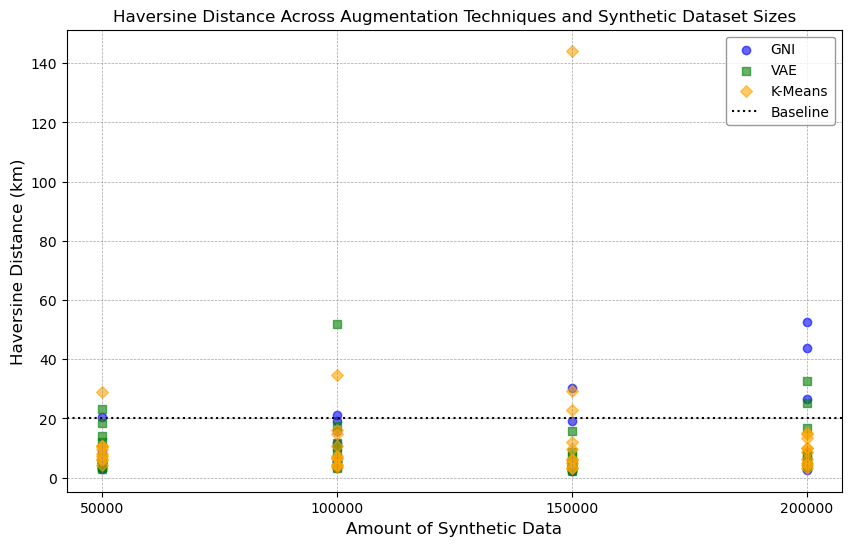

In [27]:
def plot_individual_points(cleaned_data):
    plt.figure(figsize=(10, 6))

    styles = {
        'GNI': {'marker': 'o', 'label': 'GNI', 'color': 'blue'},
        'vae': {'marker': 's', 'label': 'VAE', 'color': 'green'},
        'kmeans': {'marker': 'D', 'label': 'K-Means', 'color': 'orange'},
    }

    legend_added = set()

    for aug_type in cleaned_data['Augmentation Type'].unique():
        if aug_type == 'baseline':
            baseline_data = cleaned_data[cleaned_data['Augmentation Type'] == 'baseline']
            baseline_accuracy = baseline_data['Haversine Distance (km)'].mean()
            plt.axhline(
                y=baseline_accuracy, color='black', linestyle='dotted', label='Baseline', linewidth=1.5
            )
        else:
            for num_aug in cleaned_data['Num Augmented'].unique():
                aug_data = cleaned_data[
                    (cleaned_data['Augmentation Type'] == aug_type) &
                    (cleaned_data['Num Augmented'] == num_aug)
                ]
                if len(aug_data) > 0:
                    plt.scatter(
                        [num_aug] * len(aug_data), aug_data['Haversine Distance (km)'],
                        label=styles[aug_type]['label'] if aug_type not in legend_added else "",
                        alpha=0.6, color=styles[aug_type]['color'], marker=styles[aug_type]['marker']
                    )
                    legend_added.add(aug_type)

    plt.xticks([50000, 100000, 150000, 200000])
    plt.xlabel('Amount of Synthetic Data', fontsize=12)
    plt.ylabel('Haversine Distance (km)', fontsize=12)
    plt.title('Haversine Distance Across Augmentation Techniques and Synthetic Dataset Sizes', fontsize=12)

    plt.legend(loc='best', fontsize=10, frameon=True, edgecolor='gray')

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.show()

plot_individual_points(cleaned_data)

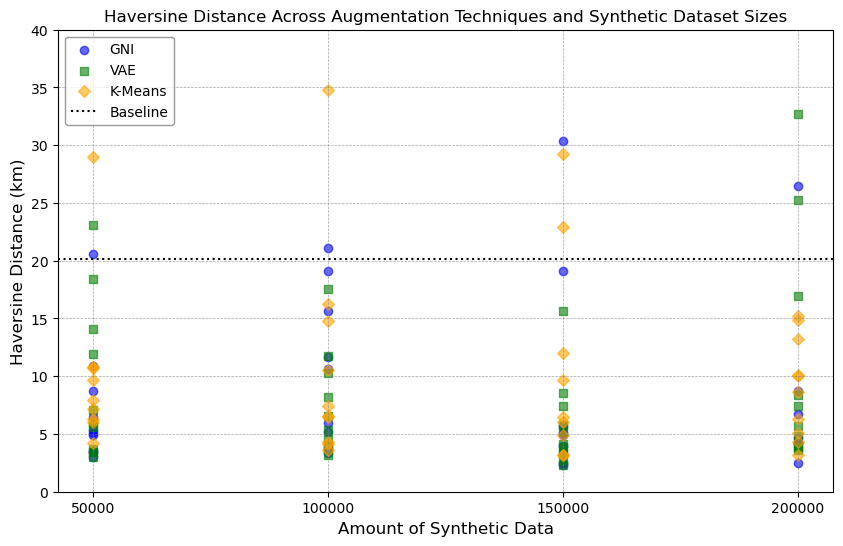

In [28]:
def plot_individual_points(cleaned_data):
    plt.figure(figsize=(10, 6))

    styles = {
        'GNI': {'marker': 'o', 'label': 'GNI', 'color': 'blue'},
        'vae': {'marker': 's', 'label': 'VAE', 'color': 'green'},
        'kmeans': {'marker': 'D', 'label': 'K-Means', 'color': 'orange'},
    }

    legend_added = set()

    for aug_type in cleaned_data['Augmentation Type'].unique():
        if aug_type == 'baseline':
            baseline_data = cleaned_data[cleaned_data['Augmentation Type'] == 'baseline']
            baseline_accuracy = baseline_data['Haversine Distance (km)'].mean()
            plt.axhline(
                y=baseline_accuracy, color='black', linestyle='dotted', label='Baseline', linewidth=1.5
            )
        else:
            for num_aug in cleaned_data['Num Augmented'].unique():
                aug_data = cleaned_data[
                    (cleaned_data['Augmentation Type'] == aug_type) &
                    (cleaned_data['Num Augmented'] == num_aug)
                ]
                if len(aug_data) > 0:
                    plt.scatter(
                        [num_aug] * len(aug_data), aug_data['Haversine Distance (km)'],
                        label=styles[aug_type]['label'] if aug_type not in legend_added else "",
                        alpha=0.6, color=styles[aug_type]['color'], marker=styles[aug_type]['marker']
                    )
                    legend_added.add(aug_type)

    plt.xticks([50000, 100000, 150000, 200000])
    plt.xlabel('Amount of Synthetic Data', fontsize=12)
    plt.ylabel('Haversine Distance (km)', fontsize=12)
    plt.ylim(0, 40)
    plt.title('Haversine Distance Across Augmentation Techniques and Synthetic Dataset Sizes', fontsize=12)

    plt.legend(loc='best', fontsize=10, frameon=True, edgecolor='gray')

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.show()

plot_individual_points(cleaned_data)

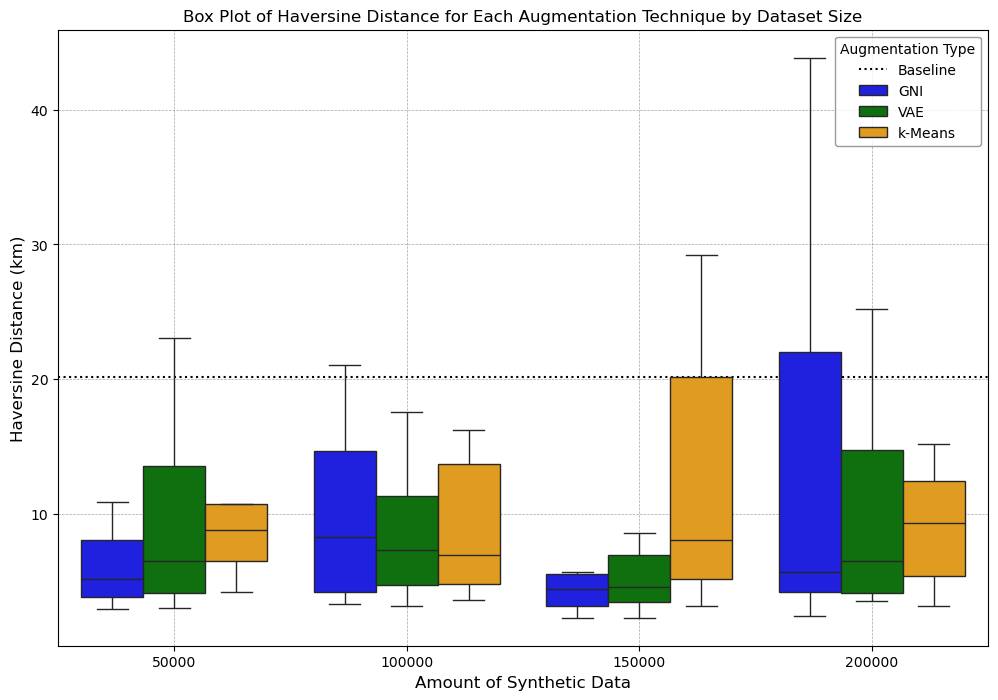

In [29]:
def boxplot_regression(cleaned_data):
    plt.figure(figsize=(12, 8))
    
    styles = {
        'GNI': {'marker': 'o', 'label': 'GNI', 'color': 'blue'},
        'vae': {'marker': 's', 'label': 'VAE', 'color': 'green'},
        'kmeans': {'marker': 'D', 'label': 'k-Means', 'color': 'orange'},
    }
    
    baseline_data = cleaned_data[cleaned_data['Augmentation Type'] == 'baseline']
    if not baseline_data.empty:
        baseline_haversine = baseline_data['Haversine Distance (km)'].mean()
        plt.axhline(
            y=baseline_haversine, 
            color='black', 
            linestyle='dotted', 
            label='Baseline', 
            linewidth=1.5
        )
    
    data_without_baseline = cleaned_data[cleaned_data['Augmentation Type'] != 'baseline'].copy()
    data_without_baseline['Augmentation Type'] = data_without_baseline['Augmentation Type'].replace({
        'vae': 'VAE',
        'kmeans': 'k-Means'
    })
    
    palette = {
        'GNI': 'blue',
        'VAE': 'green',
        'k-Means': 'orange'
    }
    
    sns.boxplot(
        data=data_without_baseline,
        x='Num Augmented',
        y='Haversine Distance (km)',
        hue='Augmentation Type',
        palette=palette,
        showfliers=False
    )
    
    plt.xlabel('Amount of Synthetic Data', fontsize=12)
    plt.ylabel('Haversine Distance (km)', fontsize=12)
    plt.title('Box Plot of Haversine Distance for Each Augmentation Technique by Dataset Size', fontsize=12)
    plt.legend(title='Augmentation Type', loc='best', fontsize=10, frameon=True, edgecolor='gray')
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    #plt.ylim(0, 50)
    plt.show()

boxplot_regression(cleaned_data)

### H2

In [30]:
augmented_data = cleaned_data[cleaned_data['Augmentation Type'].isin(['GNI', 'vae', 'kmeans'])]
grouped_data = augmented_data.groupby('Augmentation Type')['Haversine Distance (km)']

groups = [grouped_data.get_group(aug_type) for aug_type in grouped_data.groups]

kruskal_stat, kruskal_p = kruskal(*groups)
print(f"Kruskal-Wallis Statistic: {kruskal_stat}, P-Value: {kruskal_p}")

if kruskal_p < 0.05:
    print("\nKruskal-Wallis Test: Significant differences detected between augmentation techniques.")
else:
    print("\nKruskal-Wallis Test: No significant differences detected between augmentation techniques.")

pairwise_results = []
for group1, group2 in itertools.combinations(grouped_data.groups.keys(), 2):
    stat, p_value = ranksums(
        grouped_data.get_group(group1),
        grouped_data.get_group(group2)
    )
    pairwise_results.append({
        'Group 1': group1,
        'Group 2': group2,
        'Statistic': stat,
        'P-Value': p_value
    })

p_values = [result['P-Value'] for result in pairwise_results]
corrected_p_values = multipletests(p_values, method='bonferroni')[1]

for i, result in enumerate(pairwise_results):
    result['Corrected P-Value'] = corrected_p_values[i]
    result['Significant Difference'] = 'Yes' if corrected_p_values[i] < 0.05 else 'No'

pairwise_df = pd.DataFrame(pairwise_results)
print("\nPairwise Post-Hoc Comparisons:")
print(pairwise_df)

ranking = augmented_data.groupby('Augmentation Type')['Haversine Distance (km)'].mean().reset_index()
ranking = ranking.sort_values(by='Haversine Distance (km)', ascending=True).reset_index(drop=True)
ranking['Rank'] = range(1, len(ranking) + 1)

print("\nRanking of Augmentation Techniques by Mean Haversine Distance:")
print(ranking)

for i, row in ranking.iterrows():
    current_group = row['Augmentation Type']
    significant_comparisons = pairwise_df[
        (pairwise_df['Group 1'] == current_group) | (pairwise_df['Group 2'] == current_group)
    ]
    print(f"\nSignificant differences for {current_group}:")
    print(significant_comparisons[['Group 1', 'Group 2', 'Significant Difference']])

Kruskal-Wallis Statistic: 3.873099173553726, P-Value: 0.14420064419394704

Kruskal-Wallis Test: No significant differences detected between augmentation techniques.

Pairwise Post-Hoc Comparisons:
  Group 1 Group 2  Statistic   P-Value  Corrected P-Value  \
0     GNI  kmeans  -1.828276  0.067508           0.202524   
1     GNI     vae  -0.404145  0.686106           1.000000   
2  kmeans     vae   1.510733  0.130856           0.392569   

  Significant Difference  
0                     No  
1                     No  
2                     No  

Ranking of Augmentation Techniques by Mean Haversine Distance:
  Augmentation Type  Haversine Distance (km)  Rank
0               vae                 9.784277     1
1               GNI                10.271312     2
2            kmeans                13.607863     3

Significant differences for vae:
  Group 1 Group 2 Significant Difference
1     GNI     vae                     No
2  kmeans     vae                     No

Significant differences 